In [45]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Read in dataset
dataset = pd.read_csv("Road_Accident_Data.csv")

In [47]:
pd.set_option('display.max_columns', len(dataset.columns))
dataset.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/21,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/21,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/21,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/21,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/21,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [48]:
# Note original shape of dataset
original_shape = dataset.shape

In [49]:
dataset.describe()

,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307972.000000,307972.000000,307972.000000,307972.000000,307972.000000,307972.000000
mean,2021.468935,52.487004,-1.368893,1.356883,1.829066,38.866033
std,0.499035,1.339013,1.356085,0.815858,0.710476,14.032956
min,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021.000000,51.485248,-2.247942,1.000000,1.000000,30.000000
50%,2021.000000,52.225935,-1.349258,1.000000,2.000000,30.000000
75%,2022.000000,53.415517,-0.206811,1.000000,2.000000,50.000000
max,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307972 non-null  object 
 1   Accident Date               307972 non-null  object 
 2   Month                       307972 non-null  object 
 3   Day_of_Week                 307972 non-null  object 
 4   Year                        307972 non-null  int64  
 5   Junction_Control            307972 non-null  object 
 6   Junction_Detail             307972 non-null  object 
 7   Accident_Severity           307972 non-null  object 
 8   Latitude                    307972 non-null  float64
 9   Light_Conditions            307972 non-null  object 
 10  Local_Authority_(District)  307972 non-null  object 
 11  Carriageway_Hazards         5424 non-null    object 
 12  Longitude                   307972 non-null  float64
 13  Number_of_Casu

In [51]:
# Observe that "None" values in Carriageway_Hazards were interpreted as nan
# Replace missing values in Carriageway_Hazards
dataset['Carriageway_Hazards'] = dataset['Carriageway_Hazards'].fillna("None")

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307972 non-null  object 
 1   Accident Date               307972 non-null  object 
 2   Month                       307972 non-null  object 
 3   Day_of_Week                 307972 non-null  object 
 4   Year                        307972 non-null  int64  
 5   Junction_Control            307972 non-null  object 
 6   Junction_Detail             307972 non-null  object 
 7   Accident_Severity           307972 non-null  object 
 8   Latitude                    307972 non-null  float64
 9   Light_Conditions            307972 non-null  object 
 10  Local_Authority_(District)  307972 non-null  object 
 11  Carriageway_Hazards         307972 non-null  object 
 12  Longitude                   307972 non-null  float64
 13  Number_of_Casu

In [53]:
# Display Nan
nan_dataset = dataset[dataset.isna().any(axis=1)]
display(nan_dataset.head())

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
761,200901CP00129,5/15/21,May,Friday,2021,Auto traffic signal,Crossroads,Fatal,51.518229,Daylight,Camden,None,-0.105550,1,1,Metropolitan Police,Wet or damp,Single carriageway,30,6:55,Urban,NaN,Car
972,200901CW10065,1/29/21,Jan,Thursday,2021,Auto traffic signal,Crossroads,Slight,51.515218,Daylight,Westminster,None,-0.176587,1,1,Metropolitan Police,Dry,Single carriageway,30,18:34,Urban,NaN,Motorcycle over 125cc and up to 500cc
1005,200901CW10111,2/6/21,Feb,Friday,2021,Auto traffic signal,More than 4 arms (not roundabout),Slight,51.556794,Darkness - lights lit,Islington,None,-0.138427,1,2,Metropolitan Police,Wet or damp,Single carriageway,30,18:25,Urban,NaN,Car
1059,200901CW10179,1/11/21,Jan,Sunday,2021,Auto traffic signal,T or staggered junction,Slight,51.539230,Darkness - lights lit,Camden,None,-0.142316,1,1,Metropolitan Police,Wet or damp,One way street,30,0:41,Urban,NaN,Car
1089,200901CW10224,1/30/21,Jan,Friday,2021,Data missing or out of range,Not at junction or within 20 metres,Fatal,51.537504,Daylight,Camden,None,-0.193000,1,1,Metropolitan Police,Dry,Single carriageway,30,11:00,Urban,NaN,Motorcycle over 500cc


In [54]:
# Drop all rows with Nan values
dataset = dataset.dropna(how='any')
dataset.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/21,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/21,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/21,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/21,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/21,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [55]:
# Remove column unnecessary for data insights
del dataset['Accident_Index']

In [56]:
# Convert the accident date into datetime format
dataset['Accident Date'] = pd.to_datetime(dataset['Accident Date'], format='mixed')

In [57]:
# Add column to show the number of casualties per vehicle
dataset['Casualties_per_Vehicle'] = dataset['Number_of_Casualties'] / dataset['Number_of_Vehicles']

In [58]:
# Add column containing the hour the accident occurred
dataset['Hour'] = pd.to_datetime(dataset['Time'], format='%H:%M').dt.hour
dataset.head()

,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Casualties_per_Vehicle,Hour
0,2021-01-01,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car,0.5,15
1,2021-01-05,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car,5.5,10
2,2021-01-04,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car,0.5,14
3,2021-01-05,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc,0.5,8
4,2021-01-06,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car,0.5,17


In [59]:
# Clarify units of speed limit
dataset['Speed_limit'] = dataset['Speed_limit'].astype(str) + " mph"
dataset.head()

,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Casualties_per_Vehicle,Hour
0,2021-01-01,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Dry,One way street,30 mph,15:11,Urban,Fine no high winds,Car,0.5,15
1,2021-01-05,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Wet or damp,Single carriageway,30 mph,10:59,Urban,Fine no high winds,Taxi/Private hire car,5.5,10
2,2021-01-04,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Dry,Single carriageway,30 mph,14:19,Urban,Fine no high winds,Taxi/Private hire car,0.5,14
3,2021-01-05,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Frost or ice,Single carriageway,30 mph,8:10,Urban,Other,Motorcycle over 500cc,0.5,8
4,2021-01-06,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,2,Metropolitan Police,Dry,Single carriageway,30 mph,17:25,Urban,Fine no high winds,Car,0.5,17


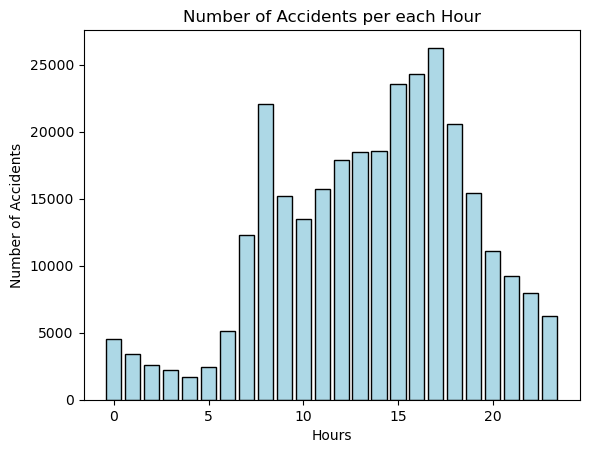

In [60]:
# Graph the accidents per hour
new_hour_counts = dataset['Hour'].value_counts().sort_index()
plt.bar(new_hour_counts.index, new_hour_counts, color='lightblue', edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per each Hour')
plt.show()

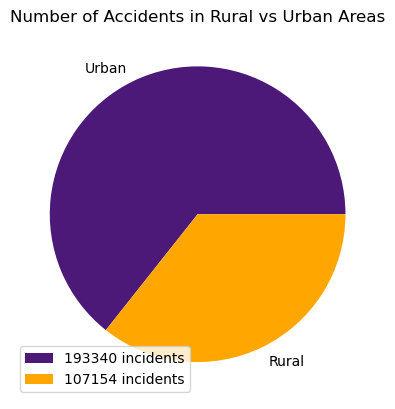

In [62]:
# Graph accidents that occurred in Urban and Rural Areas
area_counts = dataset['Urban_or_Rural_Area'].value_counts()
plt.pie(area_counts, labels=area_counts.index, colors=['#4d1979', '#ffa600'])
plt.legend(labels=[f'{count} incidents' for label, count in zip(area_counts.index, area_counts)], loc='lower left')
plt.title('Number of Accidents in Rural vs Urban Areas')
plt.show()

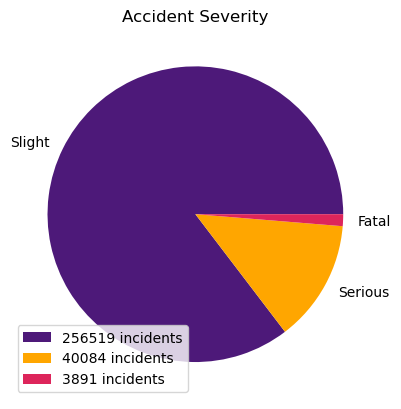

In [63]:
# Graph the number of each severity type
accident_severity = dataset['Accident_Severity'].value_counts()
plt.pie(accident_severity, labels = accident_severity.index, colors=['#4d1979', '#ffa600', '#dd255b'])
plt.legend(labels=[f'{count} incidents' for label, count in zip(accident_severity.index, accident_severity)], loc='lower left')
plt.title('Accident Severity')
plt.show()

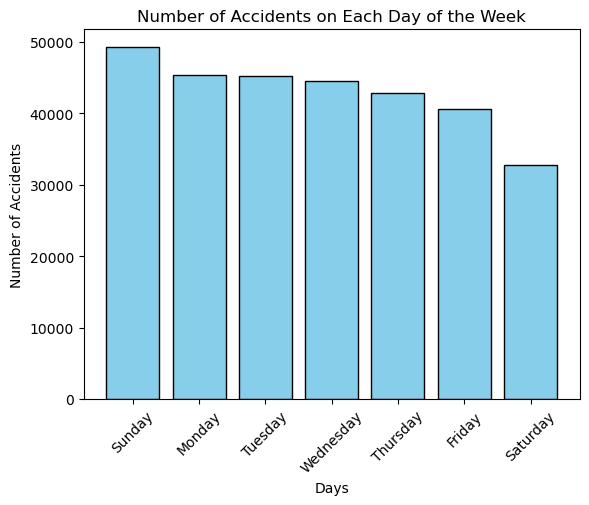

In [64]:
# Graph the number of accidents for each day of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dataset['Day_of_Week'] = pd.Categorical(dataset['Day_of_Week'], categories=day_order, ordered=True)
day_counts = dataset['Day_of_Week'].value_counts()
plt.bar(day_order, day_counts, color = 'skyblue', edgecolor='black')
plt.xlabel('Days')
plt.ylabel('Number of Accidents')
plt.xticks(rotation = 45)
plt.title('Number of Accidents on Each Day of the Week')
plt.show()

In [65]:
# Save cleaned dataset
dataset.to_csv('Cleaned_Road_Accident_Data.csv', index = False)

In [66]:
# Compare original shape to cleaned dataframe shape
print(original_shape)
print(dataset.shape)

(307972, 23)
(300494, 24)
